In [ ]:
"""
Created on 2019/2/16

example of regression using torch

Ref: 
https://morvanzhou.github.io/tutorials/machine-learning/torch/3-01-regression/
https://morvanzhou.github.io/tutorials/machine-learning/torch/3-02-classification/
https://morvanzhou.github.io/tutorials/machine-learning/torch/3-03-fast-nn/
"""

# Import

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Regression

## Data preparation

x_shape torch.Size([100, 1])
y_shape torch.Size([100, 1])


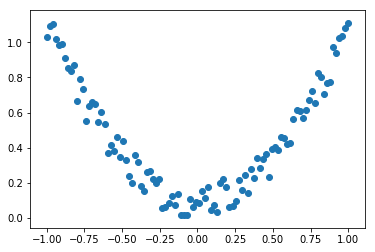

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # 加維度, x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

print("x_shape", x.shape)  # 1維特徵
print("y_shape", y.shape)
# 畫圖
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Define a net

In [11]:
class Net(torch.nn.Module): # 繼承torch的模組
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__() # 繼承__init__功能
        # 定義每層要用什麼樣的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 1維輸入 -> 10維輸出
        self.predict = torch.nn.Linear(n_hidden, n_output)  # 10維輸入 -> 1維輸出
         
    def forward(self, x): 
        # forward這個函數搭建流程圖，有點像keras API
        x = self.hidden(x) # 1dim -> 10dim
        x = F.relu(x)
        x = self.predict(x) # 10dim -> 1dim
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)
print(list(net.parameters()))

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.0960],
        [ 0.1189],
        [ 0.0769],
        [ 0.2530],
        [-0.1927],
        [ 0.4234],
        [-0.9878],
        [-0.4050],
        [-0.8705],
        [-0.2703]], requires_grad=True), Parameter containing:
tensor([-0.0914, -0.8950,  0.7943, -0.8013,  0.7440,  0.1852,  0.7015, -0.4659,
        -0.3717,  0.5202], requires_grad=True), Parameter containing:
tensor([[-0.2888,  0.1172,  0.3067, -0.0439,  0.0176, -0.2570, -0.1894, -0.2638,
         -0.1601,  0.2062]], requires_grad=True), Parameter containing:
tensor([0.0693], requires_grad=True)]


## Strat training

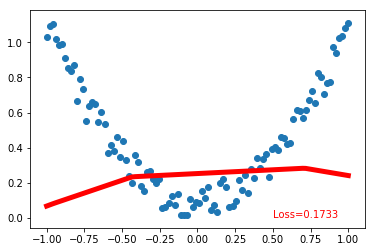

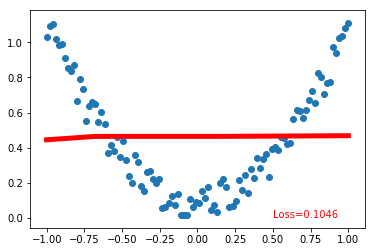

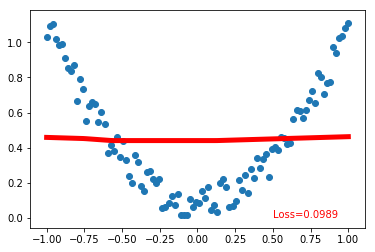

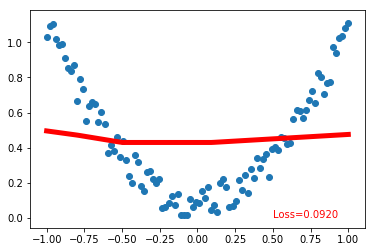

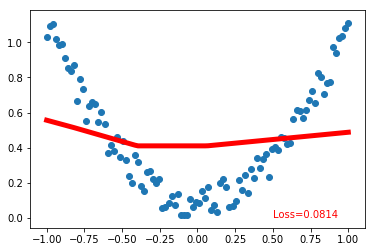

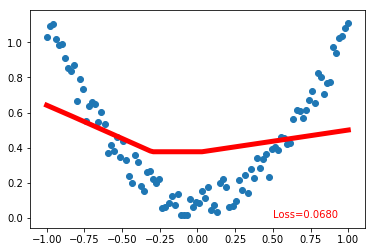

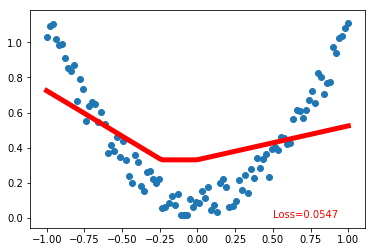

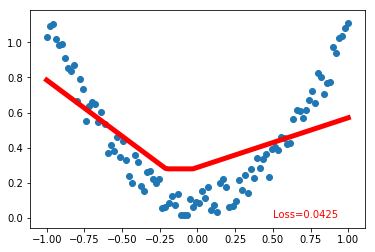

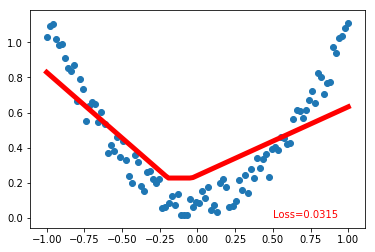

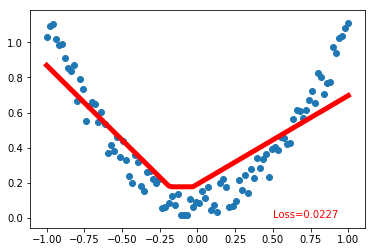

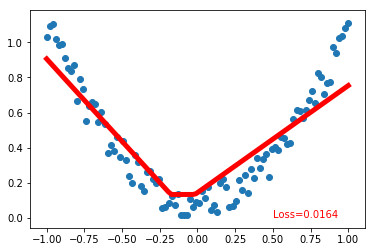

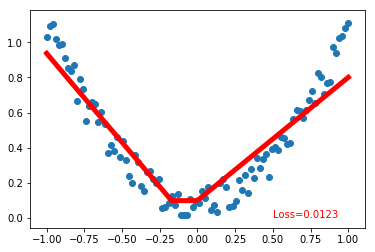

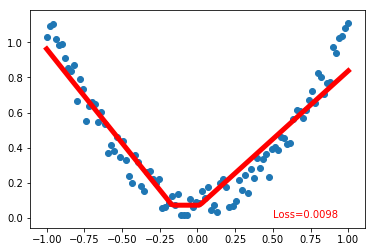

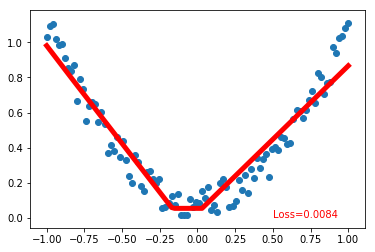

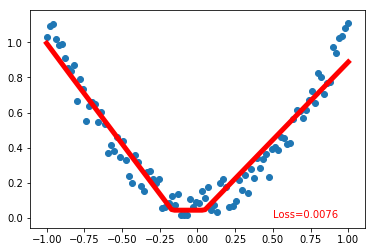

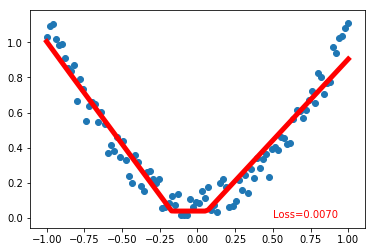

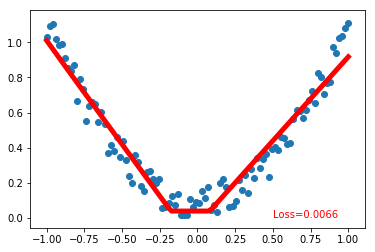

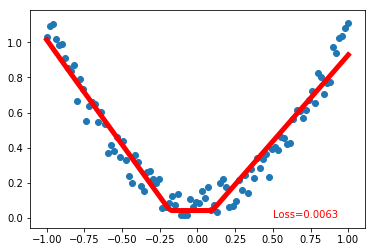

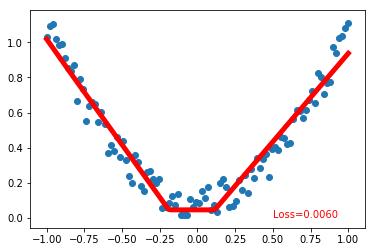

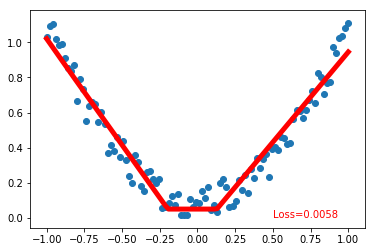

In [22]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_function = torch.nn.MSELoss()

# Dynamic Visualization
plt.ion()   # 画图
plt.show()

# Start training
for t in range(100):
    prediction = net(x)  # 將x餵给net, forward傳遞，輸出預測值
    loss = loss_function(prediction, y)   # 計算loss，prediction要放前面，label放後面
    
    # 開始優化(optimizer就是更新梯度的方法)
    optimizer.zero_grad()  # 每次梯度先歸零，否則算完會存著
    loss.backward()
    optimizer.step()  # 優化梯度
    
     # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)


In [28]:
params = list(net.parameters())
print(params)
print(params[0].shape) # weights
print(params[1].shape) # bias
print(params[2].shape) # weights
print(params[3].shape) # bias
print(params[3].grad)
print(net.predict.weight.grad) # 也可以像這樣取grad

[Parameter containing:
tensor([[-0.0875],
        [ 0.1189],
        [ 0.2087],
        [ 0.2530],
        [-0.0662],
        [ 1.0405],
        [-0.5613],
        [-0.4050],
        [-1.2871],
        [-0.1790]], requires_grad=True), Parameter containing:
tensor([-0.1001, -0.8950, -0.5123, -0.8013, -0.5014, -0.1459, -0.4536, -0.4659,
        -0.2612, -0.3846], requires_grad=True), Parameter containing:
tensor([[-0.2888,  0.1172, -0.2492, -0.0439, -0.0675,  1.0029,  0.0348, -0.2638,
          0.9401, -0.1776]], requires_grad=True), Parameter containing:
tensor([0.0547], requires_grad=True)]
torch.Size([10, 1])
torch.Size([10])
torch.Size([1, 10])
torch.Size([1])
tensor([-0.0016])
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0035, -0.0007,  0.0000,
         -0.0017,  0.0000]])


# Classification

## Data preparation

torch.Size([100, 2]) torch.Size([100, 2]) torch.Size([100]) torch.Size([100])


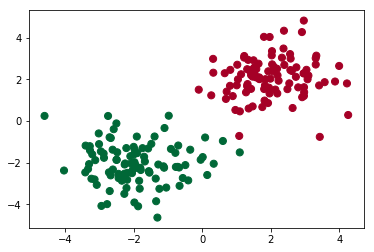

In [5]:
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(mean=2 * n_data, std=1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(mean=-2 * n_data, std=1)     # 类型1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)

print(x0.shape, x1.shape, y0.shape, y1.shape)

# 注意Torch中x, y數據的數據型態是一定要像下面一樣 -> 特徵為浮點數、標籤為整數 (torch.cat為合併數據)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)  # LongTensor = 64-bit integer

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=50, cmap='RdYlGn')
plt.show()

## Define a net

In [53]:
class Net(torch.nn.Module): # 繼承torch的模組
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__() # 繼承__init__功能
        # 定義每層要用什麼樣的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # n維輸入 -> n維輸出
        self.predict = torch.nn.Linear(n_hidden, n_output)
         
    def forward(self, x): 
        # forward這個函數搭建流程圖，有點像keras API
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)  # 輸入和輸出都變成兩個特徵了
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


## Start training

/home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


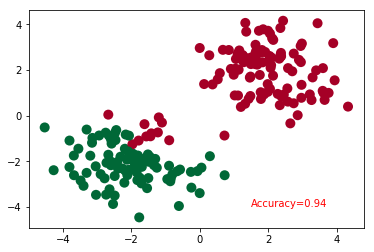

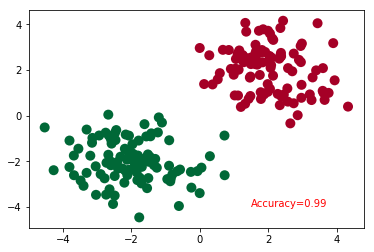

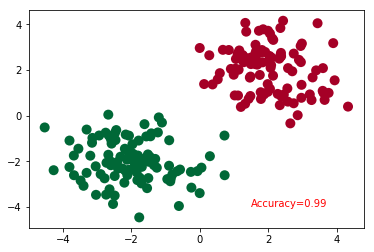

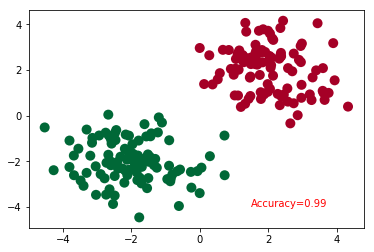

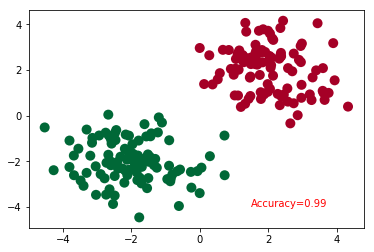

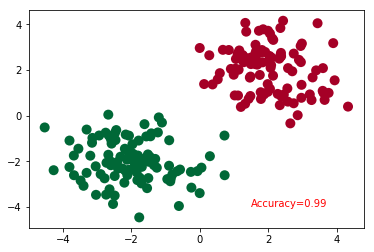

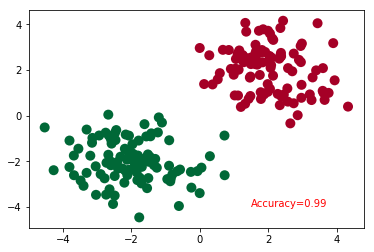

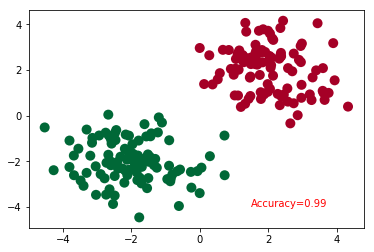

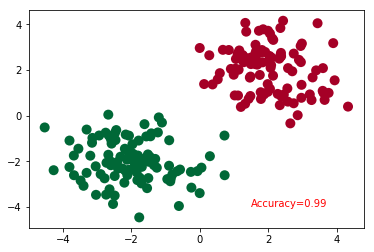

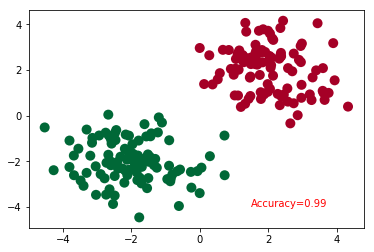

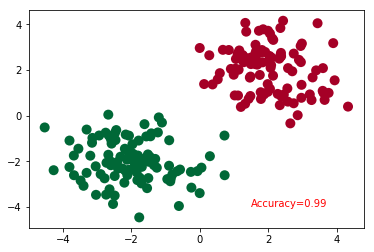

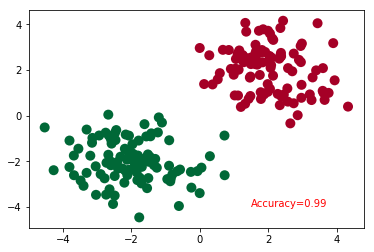

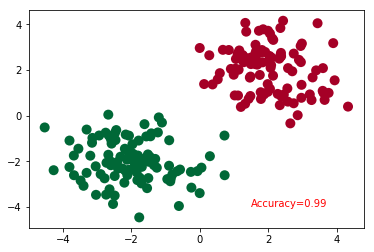

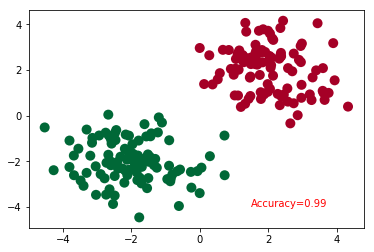

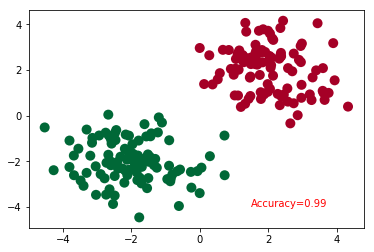

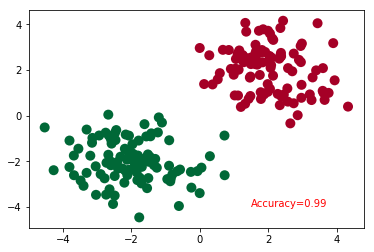

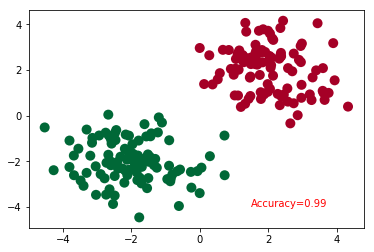

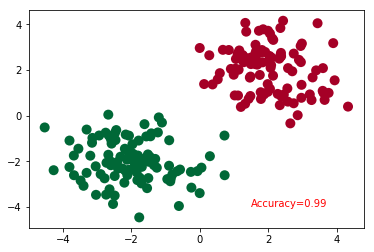

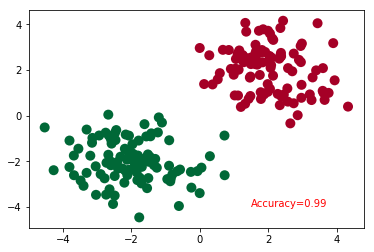

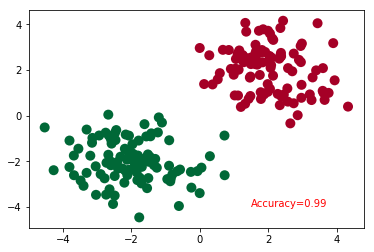

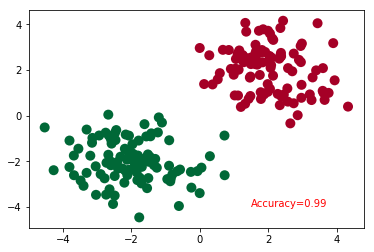

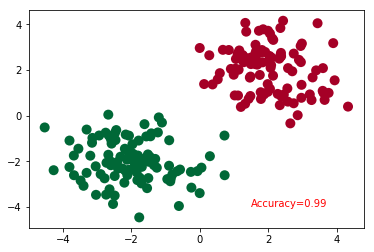

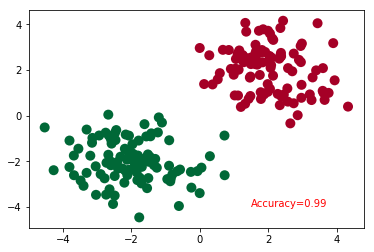

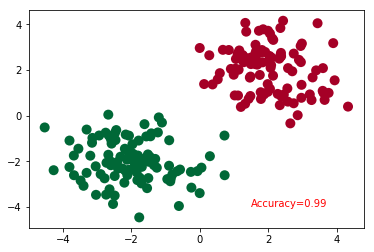

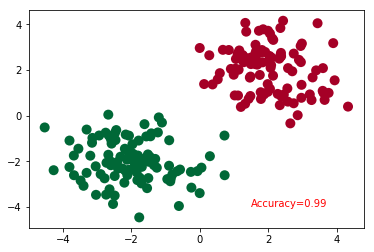

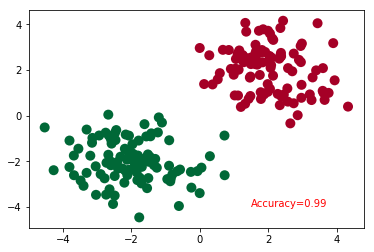

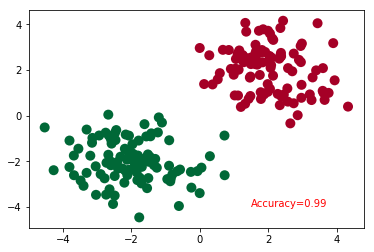

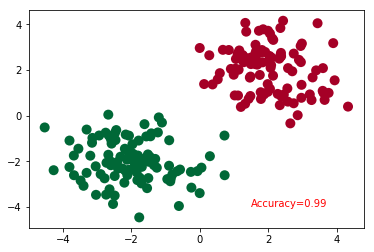

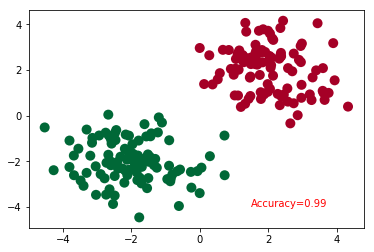

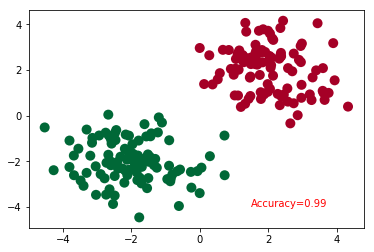

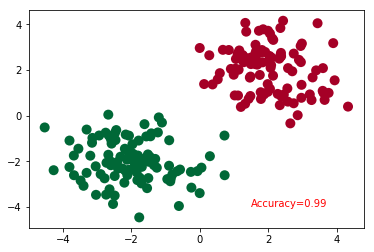

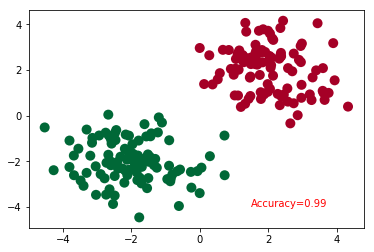

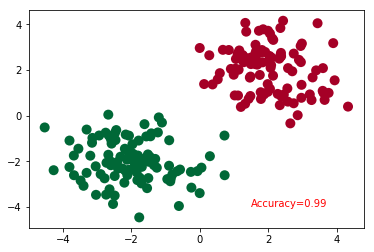

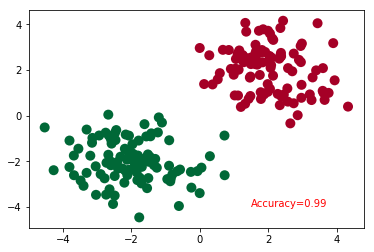

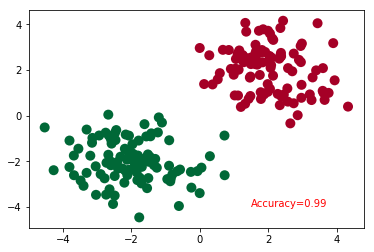

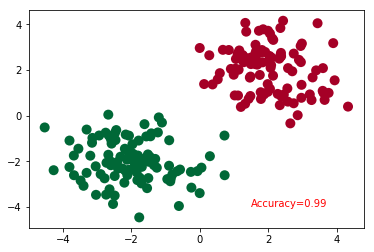

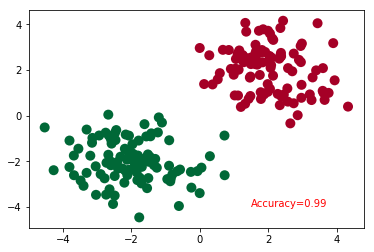

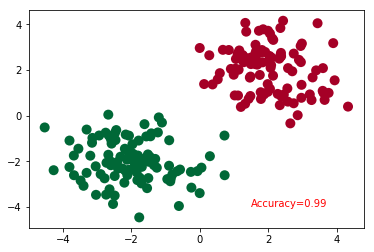

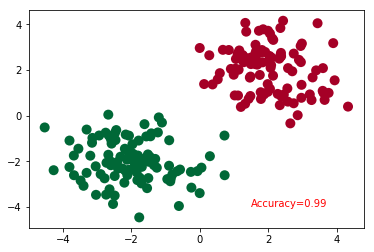

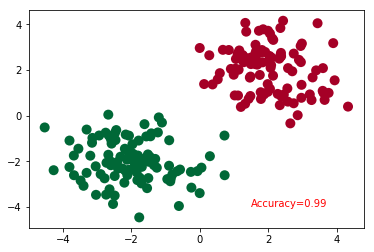

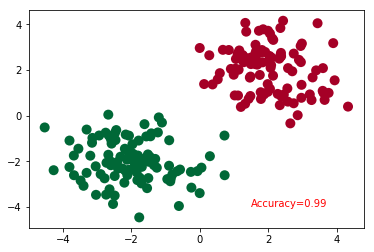

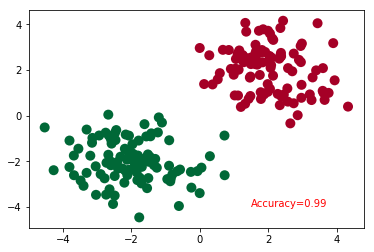

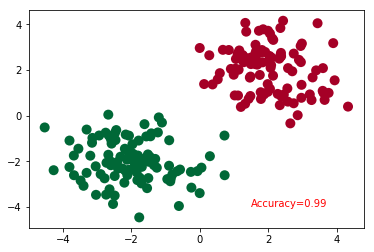

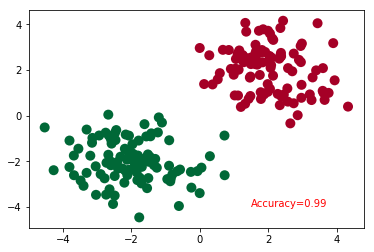

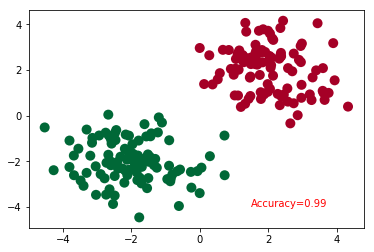

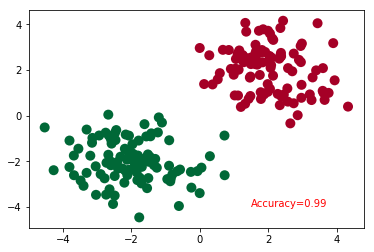

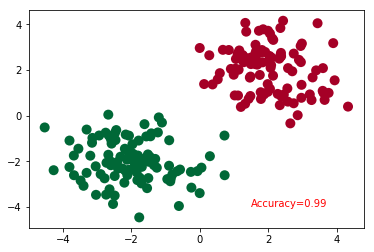

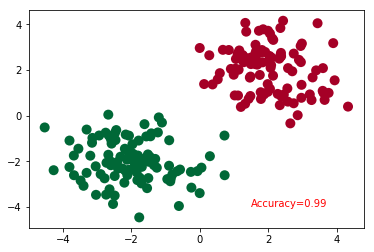

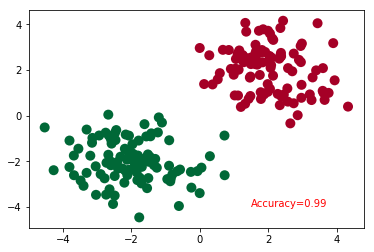

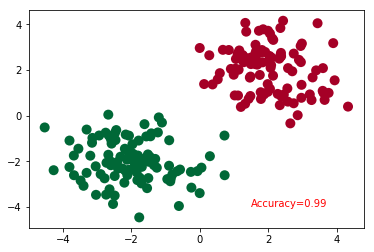

In [54]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_function = torch.nn.CrossEntropyLoss()

# Dynamic Visualization
plt.ion()   # 画图
plt.show()

# Start training
for t in range(100):
    out = net(x)  # 將x餵给net, forward傳遞，輸出預測值
    loss = loss_function(out, y)   # 計算loss，prediction要放前面，label放後面
    
    # 開始優化(optimizer就是更新梯度的方法)
    optimizer.zero_grad()  # 每次梯度先歸零，否則算完會存著
    loss.backward()
    optimizer.step()  # 優化梯度
    
    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        # 過了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]  # 取1的位置就是index
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)


## torch.max用法

In [47]:
t = torch.rand(1, 3)
print(x)
t1 = torch.max(x, 1)[1]
print(t1)
t2 = t1.numpy().squeeze()
print(t2)

tensor([[0.1728, 0.8371, 0.3732]])
tensor([1])
1


# 快速建構網路方法(torch.nn.Sequential)

## Module Class

In [15]:
class Net(torch.nn.Module): # 繼承torch的模組
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__() # 繼承__init__功能
        # 定義每層要用什麼樣的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # n維輸入 -> n維輸出
        self.predict = torch.nn.Linear(n_hidden, n_output)
         
    def forward(self, x): 
        # forward這個函數搭建流程圖，有點像keras API
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)  # 輸入和輸出都變成兩個特徵了
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


## torch Sequential

In [2]:
net2 = torch.nn.Sequential(
       torch.nn.Linear(2, 10),
       torch.nn.ReLU(),
       torch.nn.Linear(10, 2)
      )
print(net2)  # 繼承已寫好的forward

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


/home/rossleecooloh/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


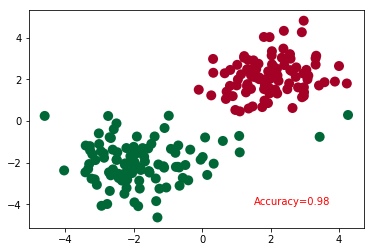

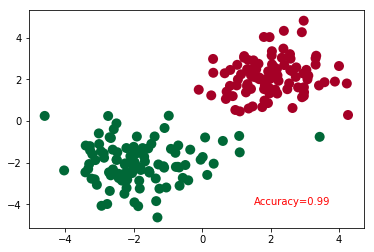

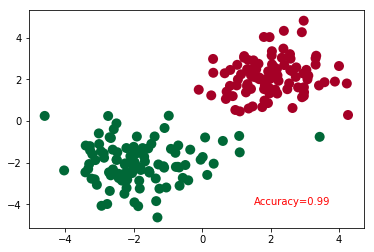

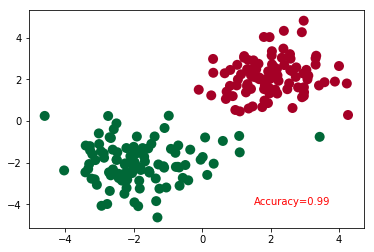

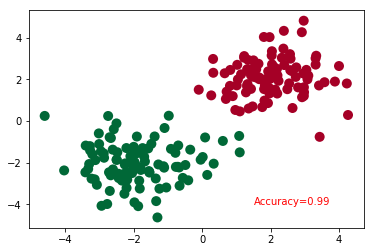

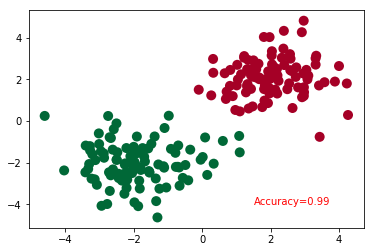

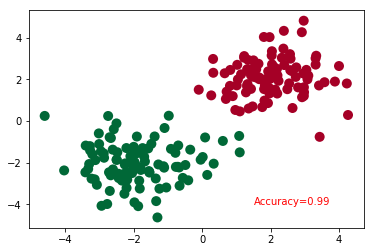

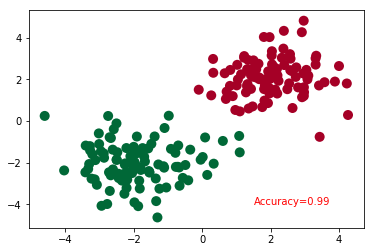

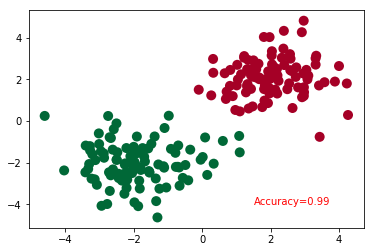

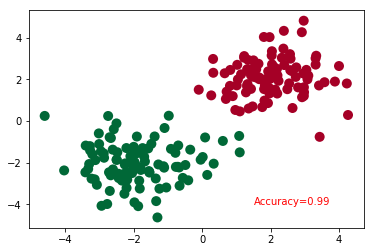

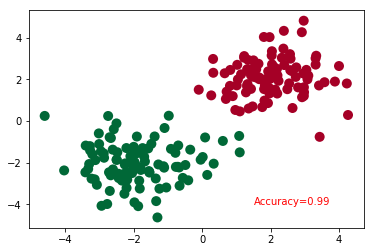

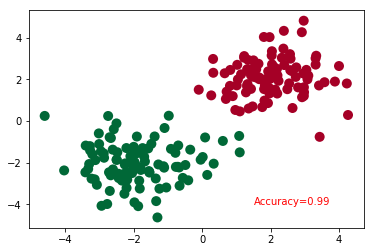

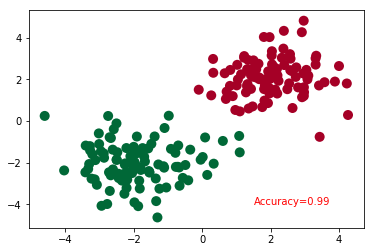

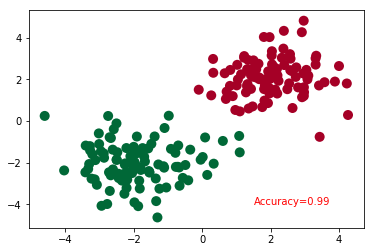

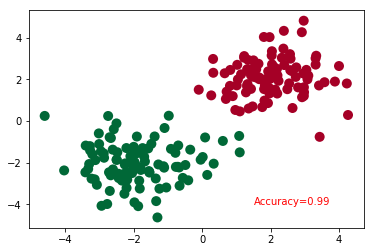

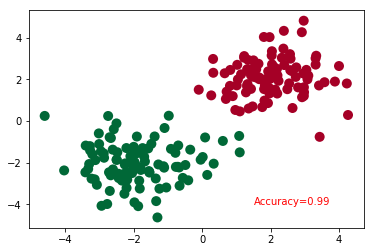

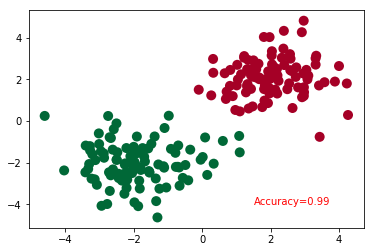

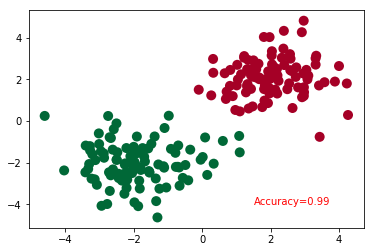

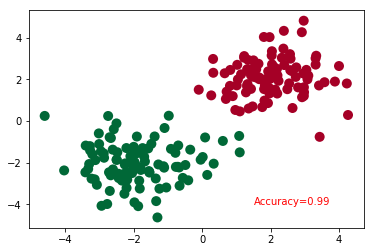

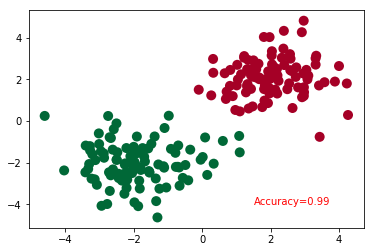

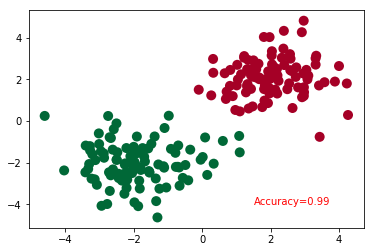

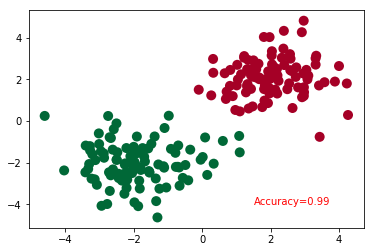

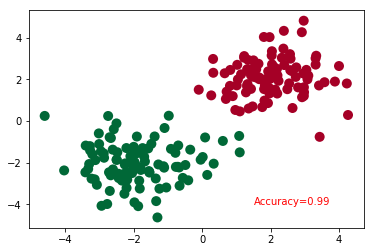

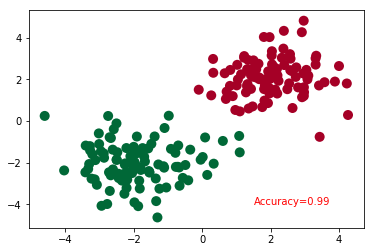

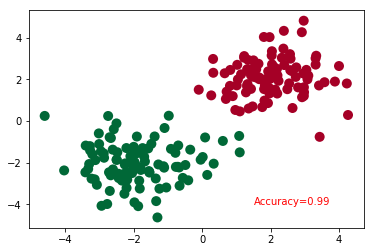

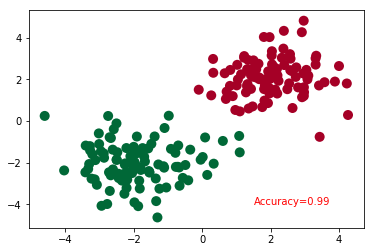

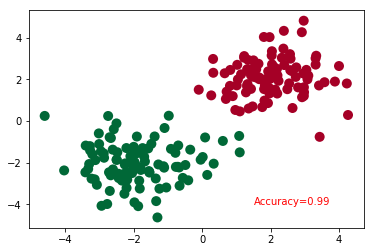

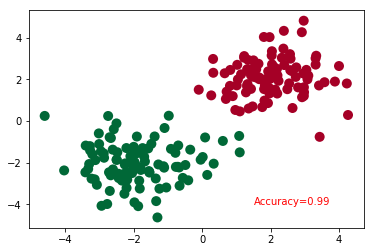

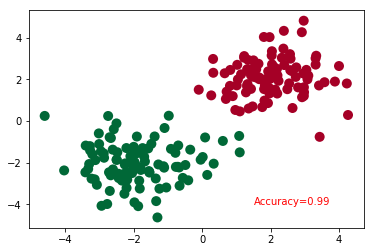

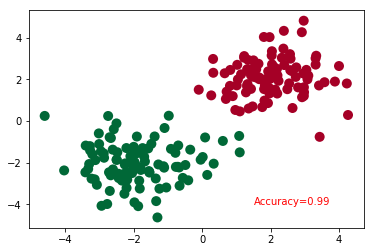

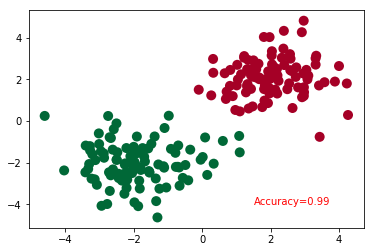

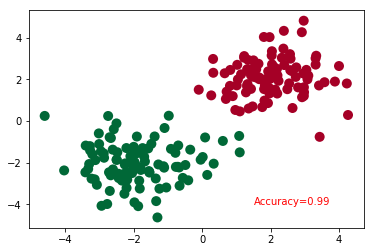

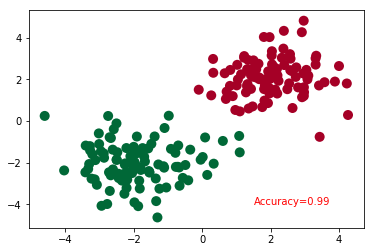

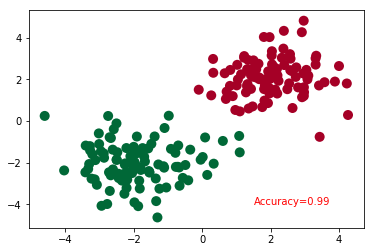

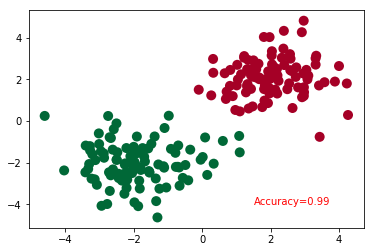

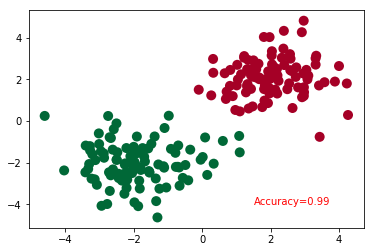

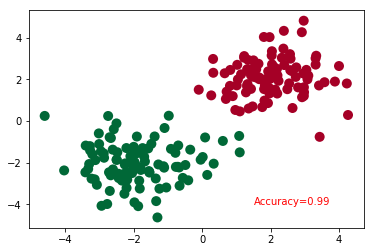

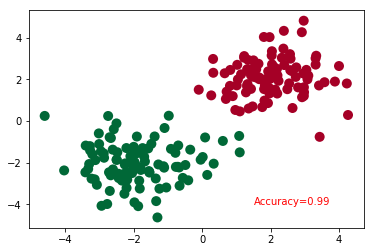

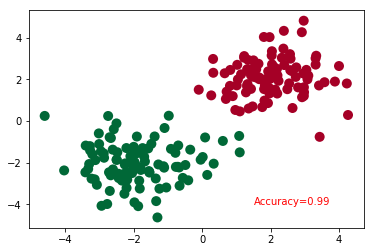

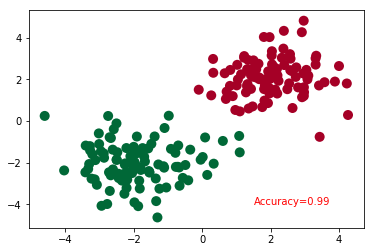

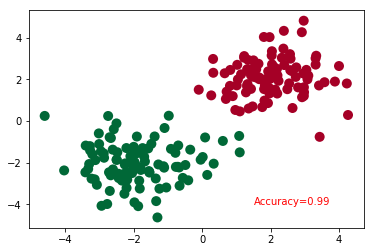

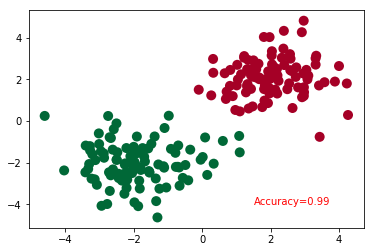

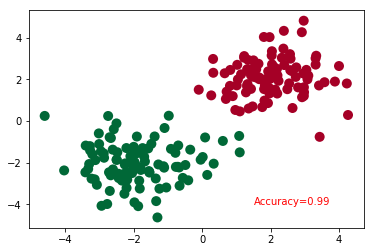

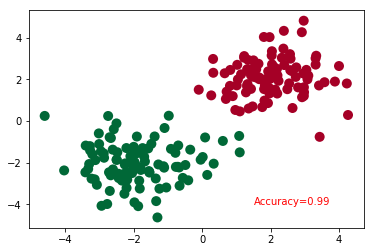

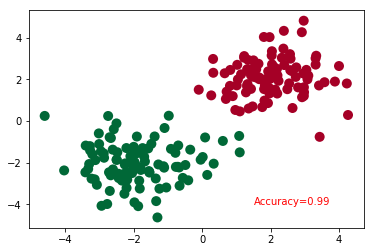

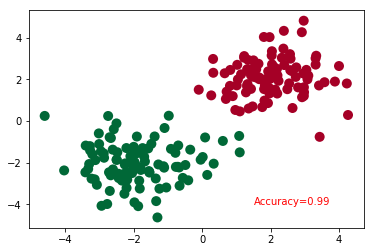

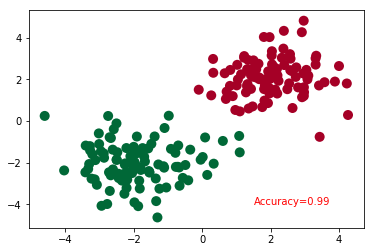

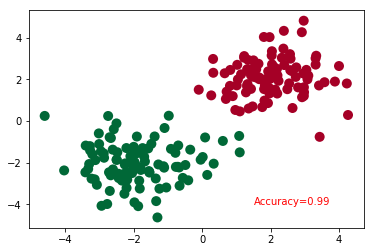

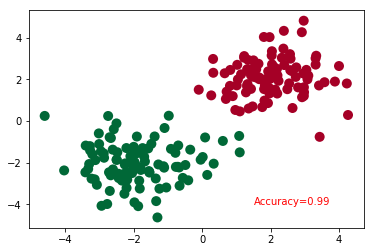

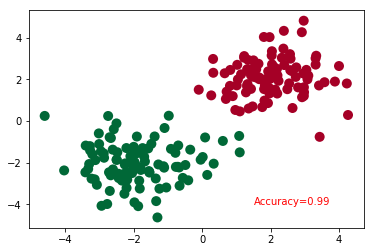

In [7]:
optimizer = torch.optim.SGD(net2.parameters(), lr=0.2)
loss_function = torch.nn.CrossEntropyLoss()

# Dynamic Visualization
plt.ion()   # 画图
plt.show()

# Start training
for t in range(100):
    out = net2(x)  # 將x餵给net, forward傳遞，輸出預測值
    loss = loss_function(out, y)   # 計算loss，prediction要放前面，label放後面
    
    # 開始優化(optimizer就是更新梯度的方法)
    optimizer.zero_grad()  # 每次梯度先歸零，否則算完會存著
    loss.backward()
    optimizer.step()  # 優化梯度
    
    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        # 過了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]  # 取1的位置就是index
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)


## 可將Sequential寫在ModuleList裡

In [11]:
# hyper parameters
in_dim = 1
n_hidden_1 = 1
n_hidden_2 = 1
out_dim = 1

class Net(torch.nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super().__init__()
        
        # 可用來寫一整個block，要注意input & ouput維度
        self.layer = torch.nn.Sequential(
            torch.nn.Linear(in_dim, n_hidden_1),
            torch.nn.ReLU(True),
            torch.nn.Linear(n_hidden_1, n_hidden_2),
            torch.nn.ReLU(True),
            # 最后一层不需要添加激活函数
            torch.nn.Linear(n_hidden_2, out_dim)
             )

    def forward(self, x):
        x = self.layer(x)
        return x

net3 = Net(in_dim, n_hidden_1, n_hidden_2, out_dim)
print(net3)

Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
    (1): ReLU(inplace)
    (2): Linear(in_features=1, out_features=1, bias=True)
    (3): ReLU(inplace)
    (4): Linear(in_features=1, out_features=1, bias=True)
  )
)


# 保存訓練結果

torch.Size([100, 2]) torch.Size([100, 2]) torch.Size([100]) torch.Size([100])


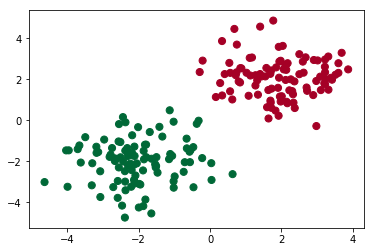

In [51]:
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(mean=2 * n_data, std=1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(mean=-2 * n_data, std=1)     # 类型1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)

print(x0.shape, x1.shape, y0.shape, y1.shape)

# 注意Torch中x, y數據的數據型態是一定要像下面一樣 -> 特徵為浮點數、標籤為整數 (torch.cat為合併數據)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)  # LongTensor = 64-bit integer

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=50, cmap='RdYlGn')
plt.show()

In [52]:
class Net(torch.nn.Module): # 繼承torch的模組
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__() # 繼承__init__功能
        # 定義每層要用什麼樣的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # n維輸入 -> n維輸出
        self.predict = torch.nn.Linear(n_hidden, n_output)
         
    def forward(self, x): 
        # forward這個函數搭建流程圖，有點像keras API
        x = self.hidden(x)
        x = F.relu(x)
        x = self.predict(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)  # 輸入和輸出都變成兩個特徵了
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [53]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_function = torch.nn.CrossEntropyLoss()

# Start training
for t in range(100):
    out = net(x)  # 將x餵给net, forward傳遞，輸出預測值
    loss = loss_function(out, y)   # 計算loss，prediction要放前面，label放後面
    
    # 開始優化(optimizer就是更新梯度的方法)
    optimizer.zero_grad()  # 每次梯度先歸零，否則算完會存著
    loss.backward()
    optimizer.step()  # 優化梯度

torch.save(net, "torch_net.pkl") # save整個網路
torch.save(net.state_dict(), "params_net.pkl")  # save所有權重

# Load模型

In [54]:
# Approach_1
net2 = torch.load("torch_net.pkl")  # 分類問題的模型
# Approach_2 (快一點點)
net3 = Net(n_feature=2, n_hidden=10, n_output=2)  # 網路各層的名字也有差別喔!!
# torch.nn.Sequential(  # 雖然網路架構同，但名字不同也是Load不進來的
#        torch.nn.Linear(2, 10),
#        torch.nn.ReLU(),
#        torch.nn.Linear(10, 2)
#       )
net3.load_state_dict(torch.load('params_net.pkl'))

In [55]:
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(mean=2 * n_data, std=1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(mean=-2 * n_data, std=1)     # 类型1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)

print(x0.shape, x1.shape, y0.shape, y1.shape)

# 注意Torch中x, y數據的數據型態是一定要像下面一樣 -> 特徵為浮點數、標籤為整數 (torch.cat為合併數據)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)  # LongTensor = 64-bit integer

x, y = Variable(x), Variable(y)

print(net2(x[0]))
print(net3(x[0]))

torch.Size([100, 2]) torch.Size([100, 2]) torch.Size([100]) torch.Size([100])
tensor([ 5.2749, -5.2472], grad_fn=<AddBackward0>)
tensor([ 5.2749, -5.2472], grad_fn=<AddBackward0>)
